In [2]:
import torch
import matplotlib.pyplot as plt
from MLP_trainer import MLP
from torch.utils.data import Dataset, DataLoader

In [3]:
input_size = 784
batch_size = 64
hidden_size = 100
num_classes = 10
learning_rate = 0.001
num_epochs = 10
model_num=0

In [4]:
class Weight(Dataset):
    def __init__(self, X):
        self.X = X
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index, :]
    

In [5]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(100, 25),
            torch.nn.ReLU(),
            torch.nn.Linear(25, 10)
        )
          

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 25),
            torch.nn.ReLU(),
            torch.nn.Linear(25, 100)
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
model = MLP(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

model.load_state_dict(torch.load(f'../model/model_{i}.ckpt'))
weights.append(model.fc1.weight.data.transpose(1, 0).flatten())
stacked_weights = torch.hstack(weights)
all_weights = stacked_weights.reshape(-1, 100)
data_loader = DataLoader(Weight(all_weights), batch_size=784)
epochs = 100
outputs = []
losses = []
for epoch in range(epochs):
    for weight in data_loader:
        optimizer.zero_grad()
        outputs = model_ae(weight)
        loss = loss_function(outputs, weight)
        loss.backward()
        optimizer.step()
        losses.append(loss.detach())
  
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses)

NameError: name 'data_loader' is not defined

In [15]:
print(losses[-1])

IndexError: list index out of range

### Use the new model to evaluate MNIST

In [6]:
import torchvision
import torchvision.transforms as transforms
import numpy as np

device = torch.device('cude' if torch.cuda.is_available() else 'cpu')

# hyperparameters
input_size = 784
batch_size = 64
hidden_size = 100
num_classes = 10
learning_rate = 0.001
num_epochs = 10
model_num=0

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data',
                                          train=False,
                                          transform=transforms.ToTensor())


# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
def evaluate_model(model):
    # Test the model
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
        print(f'Accuracy of the network on the test images: {100 * correct/total}%')
    return 100 * correct/total

In [7]:
def reconstruct_n_models(n):
    model = MLP(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
    weights = []
    for i in range(n):
        model.load_state_dict(torch.load(f'../model/model_{i}.ckpt'))
        weights.append(model.fc1.weight.data.transpose(1, 0).flatten())
    stacked_weights = torch.hstack(weights)
    all_weights = stacked_weights.reshape(-1, 100)
    data_loader = DataLoader(Weight(all_weights), batch_size=784)
    # Model Initialization
    model_ae = AE()

    # Validation using MSE Loss function
    loss_function = torch.nn.MSELoss()

    # Using an Adam Optimizer with lr = 0.1
    optimizer = torch.optim.Adam(model_ae.parameters(),
                                 lr = 1e-1,
                                 weight_decay = 1e-8)


    epochs = 100
    outputs = []
    losses = []
    for epoch in range(epochs):
        for weight in data_loader:
            optimizer.zero_grad()
            outputs = model_ae(weight)
            loss = loss_function(outputs, weight)
            loss.backward()
            optimizer.step()
            losses.append(loss.detach())

    # Defining the Plot Style
    plt.style.use('fivethirtyeight')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

    # Plotting the last 100 values
    plt.plot(losses)

    accuracies = []
    for i in range(n):
        weights = []

        model.load_state_dict(torch.load(f'../model/model_{i}.ckpt'))
        reconstructed = model_ae(model.fc1.weight.data.transpose(1, 0))
        new_weight = torch.transpose(reconstructed.reshape(784, 100), 1, 0)
        model.fc1.weight.data = new_weight
        accuracy = evaluate_model(model)
        accuracies.append(accuracy)
    return np.mean(accuracies)

Accuracy of the network on the test images: 8.92%
8.92


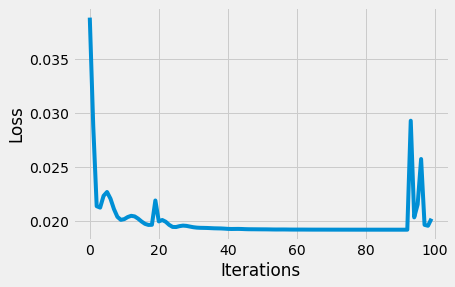

In [8]:
print(reconstruct_n_models(1))

Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 9.53%
Accuracy of the network on the test images: 10.14%
Accuracy of the network on the test images: 10.01%
Accuracy of the network on the test images: 10.15%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 11.71%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 9.74%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 10.34%
Accuracy of the network on the test images: 5.34%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 9.74%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test ima

Accuracy of the network on the test images: 9.74%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.91%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.7%
Accuracy of the network on the test images: 10.55%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.09%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.85%
Accuracy of the network on the test images: 10.62%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 13.98%
Accuracy of the network on the test images: 9.57%
Accuracy of the network on the test ima

Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 14.33%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 11.11%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.34%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.32%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 9.51%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 8.92%
Accuracy of the network on the test images: 10.19%
Accuracy of the network on the test images: 10.28%
Accuracy of the network on the test ima

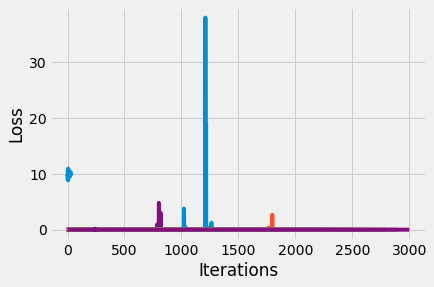

In [9]:
avg_accuracies = []
for i in range(30):
    avg_acc = reconstruct_n_models(i + 1)
    avg_accuracies.append(avg_acc)
plt.plot(avg_accuracies)

In [63]:
print(avg_accuracies)

[81.48, 54.975, 46.46333333333333, 35.62, 36.624, 31.796666666666667, 24.740000000000002, 23.78875, 36.586666666666666, 18.810999999999996, 15.436363636363637, 18.118333333333336, 16.802307692307693, 15.114285714285716, 13.762666666666666, 19.62125, 16.174117647058825, 14.024999999999999, 15.987894736842104, 12.565999999999999, 13.599047619047615, 15.05318181818182, 16.57086956521739, 16.895, 14.864, 15.095769230769228, 13.150740740740742, 12.918214285714285, 15.461034482758619, 15.103333333333333]


In [1]:
import numpy as np
a = [81.48, 54.975, 46.46333333333333, 35.62, 36.624, 31.796666666666667, 24.740000000000002, 23.78875, 36.586666666666666, 18.810999999999996, 15.436363636363637, 18.118333333333336, 16.802307692307693, 15.114285714285716, 13.762666666666666, 19.62125, 16.174117647058825, 14.024999999999999, 15.987894736842104, 12.565999999999999, 13.599047619047615, 15.05318181818182, 16.57086956521739, 16.895, 14.864, 15.095769230769228, 13.150740740740742, 12.918214285714285, 15.461034482758619, 15.103333333333333]

Text(0.5, 1.0, 'Accuracy vs No of models passed through AE')

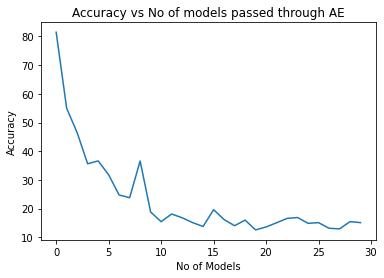

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a)
plt.xlabel('No of Models')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No of models passed through AE')